In [1]:
from util import linear_beta_schedule, quadratic_beta_schedule
from util import cosine_beta_schedule, sigmoid_beta_schedule

import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

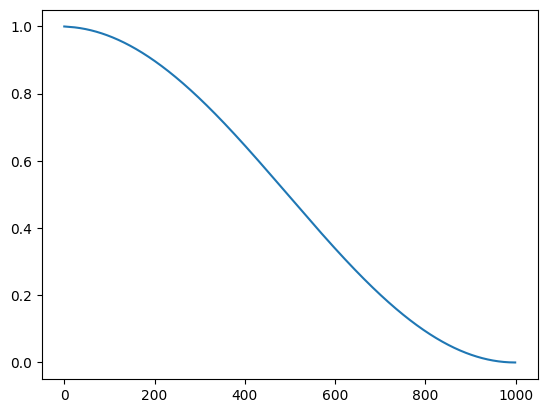

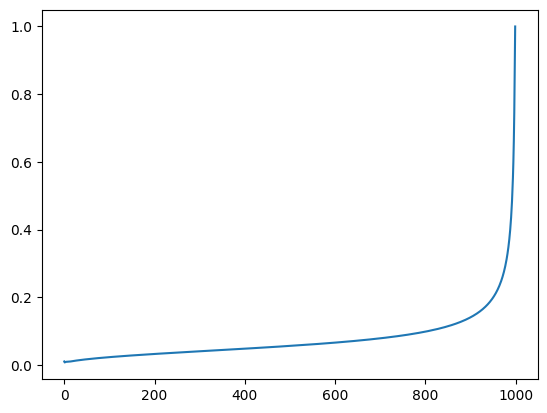

In [24]:
T = 1000
Beta = linear_beta_schedule(T, 0.0001, 0.02)
Beta = cosine_beta_schedule(T)
Alpha = 1 - Beta
Alpha_bar = torch.ones(T)
Beta_tilde = Beta + 0
alphas_cumprod = torch.cumprod(Alpha, axis=0)
plt.plot(alphas_cumprod)
plt.show()

Beta_tilde = Beta + 0
for t in range(T):
    Alpha_bar[t] *= Alpha[t] * Alpha_bar[t-1] if t else Alpha[t]
    if t > 0:
        Beta_tilde[t] *= (1-Alpha_bar[t-1]) / (1-Alpha_bar[t])
Sigma = torch.sqrt(Beta_tilde)

plt.plot(Sigma)

In [10]:
import torch.nn.functional as F

In [13]:
np.linalg.norm(Alpha_bar.numpy() - alphas.numpy())

18.934265

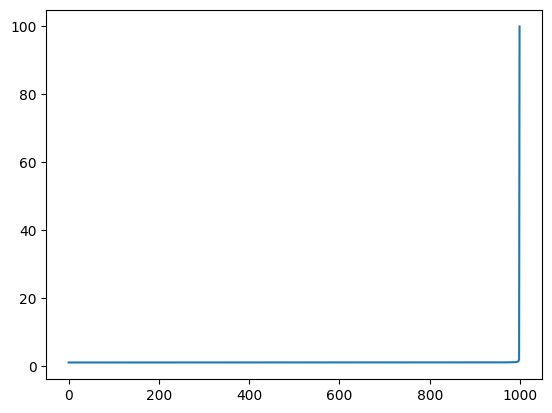

In [14]:
# define alphas 
alphas = 1. - Beta
alphas_cumprod = torch.cumprod(alphas, axis=0)
alphas_cumprod_prev = F.pad(alphas_cumprod[:-1], (1, 0), value=1.0)
sqrt_recip_alphas = torch.sqrt(1.0 / alphas)
plt.plot(sqrt_recip_alphas)

In [3]:
traning_loss_14_02 = {
    "loss": [
        0.0010051048542663922,
        0.0010181666951939406,
        0.0006651764635171275,
        0.001747845251866238,
        0.0006954947305712267,
        0.0005715285575024609,
        0.0007372650068464281,
        0.0005212161280269356,
        0.0006302859136940242,
        0.0005295999450845557,
        0.0003905125715300528,
        0.0003795979086680745,
        0.0005822282209464902,
        0.0005161046200009878,
        0.000283081152365412,
        0.0003585064803428395,
        0.0003078046140717561,
        0.0003034917932063763,
        0.00043125536476964045,
        0.00022182416900250245,
        0.0002380980272528177,
        0.0002842597514654699,
        0.0002444433047048733,
        0.00021563403331583685,
        0.00031699810660484217,
        0.00017952318650031883,
        0.00022983757058227638,
        0.00017122828210176523,
        0.0011200419537408378,
        0.0003663790628525021,
        0.0002612638066011641,
        0.00018742682876563777,
        0.000193053829375458,
        0.00019444919970283082,
        0.0001810688117711834,
        0.00021454372853440873,
        0.00015317242805167552,
        0.004604115762867877,
        0.0004442519159601943,
        0.0003066818185106968,
        0.0002573296041828144,
        0.00030654666599275513,
        0.00019991444079551002,
        0.0001884335966906292,
        0.00015862026857575983,
        0.00018211674056601624,
        0.00020077191819837026,
        0.0001474582770356392,
        0.000166163426449657,
        0.00013385280962211255,
        0.00017134566648337567,
        0.00018495682489628963,
        0.00010217448619414426,
        0.00013317368660409557,
        0.00017722670672583264,
        0.00013520333980750364,
        0.00011091284794702005,
        0.0017485085493706264,
        0.00018473589379027543,
        0.00012785795860963844,
        0.00016868324349161412,
        0.00010830200514192257,
        0.00012663027650432922,
        0.00012957866551232655,
        0.000105550844427853,
        0.01327756388731359,
        0.0005865187895687995,
        0.0003775869005221466,
        0.0003140106417686184,
        0.00027550687747861957
    ],
    "val_loss": [
        4.020808730274439e-05,
        2.9237111448310315e-06,
        4.727196937892586e-06,
        6.112094852142036e-06,
        3.8146940642036497e-06,
        9.858891135081648e-06,
        3.6667025415226818e-06,
        1.9925726519431917e-06,
        6.202248623594642e-06,
        2.136162220267579e-06,
        3.0230317497625948e-06,
        1.1130650818813592e-06,
        4.637370875570923e-06,
        4.328444993006997e-07,
        1.1766794341383502e-06,
        5.13541279360652e-06,
        1.972328464034945e-06,
        1.098438078770414e-06,
        1.288915955228731e-06,
        7.233464566525072e-07,
        2.679185417946428e-06,
        6.801384006394073e-07,
        7.855410513002426e-07,
        4.095329495612532e-07,
        1.4112480857875198e-06,
        2.1581266992143356e-07,
        3.913441832992248e-07,
        5.781899744761176e-07,
        2.3635207617189736e-06,
        3.4343471634201707e-06,
        1.6148235590662807e-06,
        2.99709881801391e-07,
        7.905810343800113e-07,
        2.4389293685089796e-07,
        1.274620444746688e-06,
        3.219650898245163e-07,
        1.1102024291176349e-06,
        1.7274625133723022e-06,
        1.7024575208779425e-06,
        8.355191675946117e-07,
        6.431558722397312e-07,
        9.612392022972926e-07,
        4.231897764839232e-07,
        4.2185660277027636e-07,
        4.0642276871949434e-07,
        8.997946861200034e-07,
        1.2743941624648869e-06,
        1.7913655028678477e-07,
        5.419621084001847e-07,
        1.090530422516167e-06,
        3.523859777487814e-07,
        2.3010519726085476e-07,
        3.384289448149502e-07,
        1.7389252025168389e-06,
        4.130833622184582e-07,
        2.7772863177233374e-07,
        6.48550339974463e-07,
        7.44930948712863e-07,
        2.2670468024443833e-06,
        2.6252251700498163e-07,
        5.540670827031135e-07,
        2.843591028067749e-07,
        4.1939485527109356e-07,
        5.776482794317417e-07,
        2.4389145255554466e-06,
        3.222381928935647e-06,
        1.9028963288292288e-06,
        1.398756867274642e-06,
        1.1168352648383007e-06,
        6.811179628130048e-07
    ]
}
traning_loss_28_02 = {
    "loss": [
        0.053207862808485516,
        0.006621654043119634,
        0.0033655551241827198,
        0.0019251222021557624,
        0.001995345057657687,
        0.0014018309567109099,
        0.0016791379989808774,
        0.001245672207478492,
        0.000755162888654013,
        0.0007690751435984566,
        0.0012223173496931849,
        0.0005799316730372084,
        0.0014934313889170881,
        0.0005115302050762694,
        0.0004940719037131203,
        0.00040771815504740515,
        0.0023978660610191583,
        0.0006012280440882023,
        0.0006200948618607072,
        0.000347337902558138,
        0.00046181626388715815,
        0.0004784968578132975,
        0.0002448262980124127,
        0.0008646275315823004,
        0.0002274908444360335,
        0.0017682540084842913,
        0.0003196720623418514,
        0.00025520738578961756,
        0.0002837387361068977,
        0.0006239008177817596,
        0.00019915997115276695,
        0.00023861619692524982,
        0.0022726327258078527,
        0.00042209166386783184,
        0.00026438793088345847,
        0.0003704967641215262,
        0.0002770045526904141,
        0.00020604330896276224,
        0.001839209893360021,
        0.0013037597903530695,
        0.0006714322717562026,
        0.0003634053108999069,
        0.0002168938151862676,
        0.0002365229792167156,
        0.00017864172741610673,
        0.001116616727863402,
        0.0001823248460459581,
        0.00018859149832678668,
        0.0002081056221459221,
        0.0001419626327970036,
        0.0008510539247481574,
        0.0003263418444385024,
        0.00021322706244063737,
        0.00016505894613601412,
        0.0003438459606286415
    ],
    "val_loss": [
        0.00690378890838474,
        0.003168066155631095,
        0.0024134253786178305,
        0.004124916433356702,
        0.002848048585583456,
        0.0010383991870912723,
        0.002292022720212117,
        0.0006610665954940487,
        0.0012172486574854701,
        0.001470042607979849,
        0.0004766535542148631,
        0.00031892186438199134,
        0.0010670780795044266,
        0.0003010887973505305,
        0.000363984726354829,
        0.0006002835884282832,
        0.0007068189796700608,
        0.0004807017592975171,
        0.00033608010060561357,
        0.0006610069100861437,
        0.00022764661003748187,
        0.00021096350861625978,
        0.0019080918823601678,
        0.0001764933828235371,
        0.00026190429322014096,
        0.00043221040177741086,
        0.00023575757753860671,
        0.0003118544808967272,
        0.00013314137286215554,
        0.0001701098866396933,
        0.00016381671059207293,
        0.00016754672520619352,
        0.0007862359652062878,
        0.00027201652290386846,
        0.0001665999534088769,
        0.00022210036080650753,
        0.0001306451065829606,
        0.00036192752555507467,
        0.007220876587089151,
        0.00036412519213627095,
        0.0002399931143372669,
        0.00016343236828106456,
        0.0002526760138789541,
        0.00011933411409700057,
        0.0009541936484311009,
        0.0002414129417957156,
        0.00014229347756554488,
        0.0001414919630406075,
        0.00016866642163222424,
        8.785901009105146e-05,
        0.0010001680567802396,
        0.00015443584823515266,
        0.00013259229381219485,
        0.00015284670269466005,
        0.00012875162732598256
    ]
}

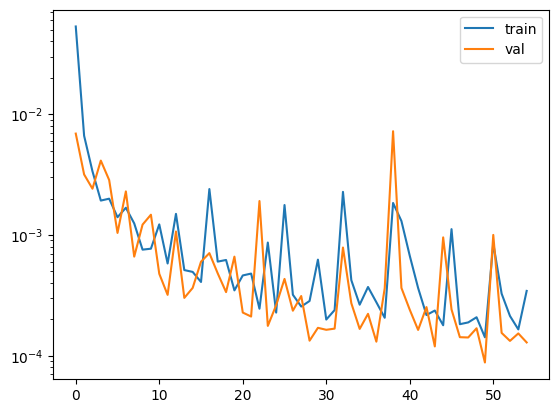

In [11]:
plt.plot(traning_loss_28_02["loss"], label="train")
plt.plot(traning_loss_28_02["val_loss"], label="val")
#plt.plot(traning_loss_14_02["loss"], label="train_[0,1]")
plt.yscale('log')
plt.legend()
plt.show()

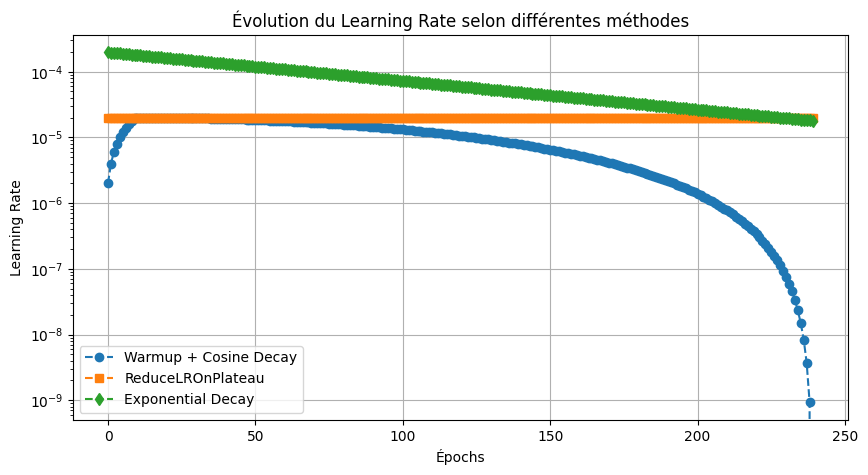

In [25]:
import torch
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
import matplotlib.pyplot as plt
import math

# Simuler trois modèles distincts
model1 = torch.nn.Linear(10, 1)
model2 = torch.nn.Linear(10, 1)
model3 = torch.nn.Linear(10, 1)

# Définir trois optimizers distincts
optimizer_cosine = optim.Adam(model1.parameters(), lr=2e-5)
optimizer_plateau = optim.Adam(model2.parameters(), lr=2e-5)
optimizer_exp = optim.Adam(model3.parameters(), lr=2e-4)

# Nombre d'époques
num_epochs = 240

# Méthode 1: Warmup + Cosine Decay
def lr_lambda(epoch):
    warmup_epochs = 10
    if epoch < warmup_epochs:
        return epoch / warmup_epochs  # Linearly increase LR
    return 0.5 * (1 + math.cos((epoch - warmup_epochs) / (num_epochs - warmup_epochs) * math.pi))  # Cosine decay

scheduler_cosine = lr_scheduler.LambdaLR(optimizer_cosine, lr_lambda)

# Méthode 2: ReduceLROnPlateau avec patience plus courte
scheduler_plateau = lr_scheduler.ReduceLROnPlateau(optimizer_plateau, mode='min', factor=0.5, patience=3, threshold=0.01)

# Méthode 3: Exponential Decay
scheduler_exp = lr_scheduler.ExponentialLR(optimizer_exp, gamma=0.99)

# Stocker les LR pour chaque méthode
lrs_cosine = []
lrs_plateau = []
lrs_exp = []

# Simuler une loss décroissante plus réaliste
simulated_losses = [0.1 / (1 + 0.05 * epoch) for epoch in range(num_epochs)]

for epoch in range(num_epochs):
    # Mettre à jour les optimizers
    optimizer_plateau.step()
    optimizer_cosine.step()
    optimizer_exp.step()
    
    # Mettre à jour les schedulers
    scheduler_cosine.step()
    scheduler_exp.step()
    scheduler_plateau.step(simulated_losses[epoch])  # On simule une loss qui diminue progressivement
    
    # Enregistrer les LR
    lrs_cosine.append(optimizer_cosine.param_groups[0]['lr'])
    lrs_exp.append(optimizer_exp.param_groups[0]['lr'])
    lrs_plateau.append(optimizer_plateau.param_groups[0]['lr'])

# Plot des résultats
plt.figure(figsize=(10, 5))
plt.plot(lrs_cosine, label='Warmup + Cosine Decay', linestyle='--', marker='o')
plt.plot(lrs_plateau, label='ReduceLROnPlateau', linestyle='--', marker='s')
plt.plot(lrs_exp, label='Exponential Decay', linestyle='--', marker='d')

plt.xlabel('Épochs')
plt.ylabel('Learning Rate')
plt.yscale('log')  # Mettre l'échelle en log pour mieux voir l'évolution
plt.title('Évolution du Learning Rate selon différentes méthodes')
plt.legend()
plt.grid()
plt.show()

In [29]:
import torch
import copy

class EMA:
    def __init__(self, model, beta=0.9999):
        self.beta = beta
        self.model = model
        self.ema_model = copy.deepcopy(model)  # Création du modèle EMA (copie initiale)
        for param in self.ema_model.parameters():
            param.detach_()  # On empêche la mise à jour par backprop

    def update(self):
        with torch.no_grad():  # Pas de gradient ici
            for ema_param, param in zip(self.ema_model.parameters(), self.model.parameters()):
                ema_param.data = self.beta * ema_param.data + (1 - self.beta) * param.data

# Simuler un modèle PyTorch
model = torch.nn.Linear(10, 1)
ema = EMA(model, beta=0.9999)

# Simulation d'entraînement
for epoch in range(5):
    # Simuler une mise à jour des poids du modèle
    with torch.no_grad():
        for param in model.parameters():
            param.add_(torch.randn_like(param) * 0.01)  # Simule une mise à jour avec bruit

    # Mettre à jour le modèle EMA
    ema.update()

    # Comparer les poids (Correction ici)
    print(f"Époch {epoch+1}")
    print(f"Poids du modèle normal: {list(model.parameters())[0].flatten()[0].item():.6f}")
    print(f"Poids du modèle EMA   : {list(ema.ema_model.parameters())[0].flatten()[0].item():.6f}")
    print("-" * 30)


Époch 1
Poids du modèle normal: -0.300767
Poids du modèle EMA   : -0.305904
------------------------------
Époch 2
Poids du modèle normal: -0.298383
Poids du modèle EMA   : -0.305903
------------------------------
Époch 3
Poids du modèle normal: -0.267921
Poids du modèle EMA   : -0.305899
------------------------------
Époch 4
Poids du modèle normal: -0.270611
Poids du modèle EMA   : -0.305895
------------------------------
Époch 5
Poids du modèle normal: -0.240660
Poids du modèle EMA   : -0.305889
------------------------------
